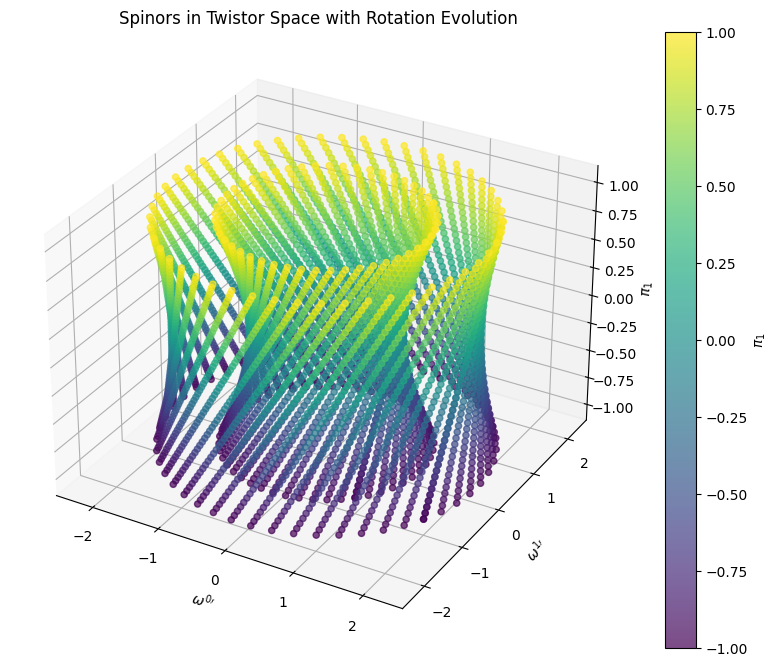

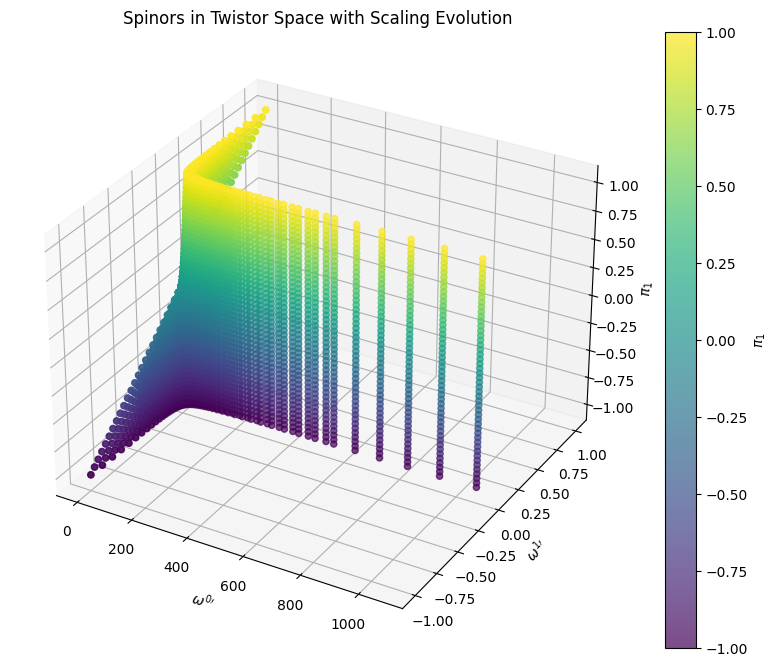

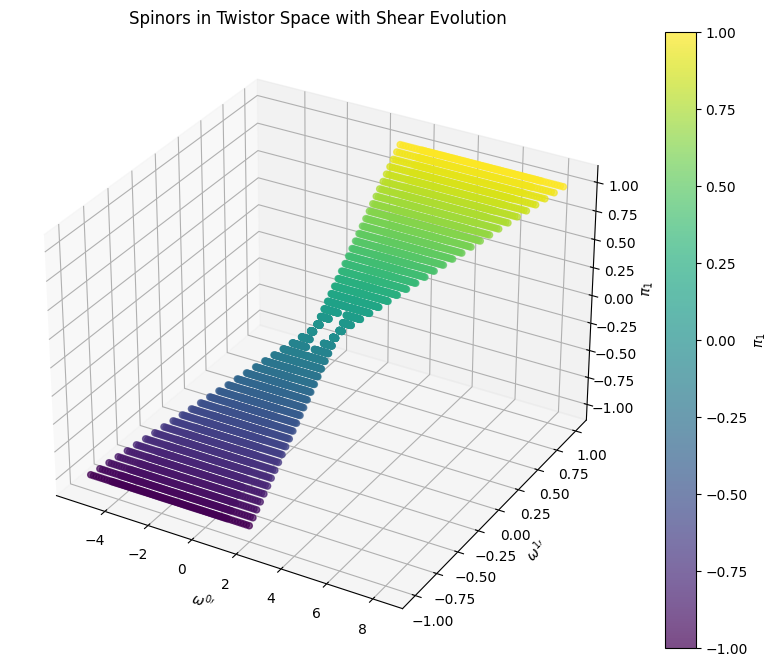

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons

# Define the intrinsic evolution operator (rotation matrix)
def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

# Define the spinor evolution function
def evolve_spinor(omega, pi, theta, evolution_func):
    evolution_matrix = evolution_func(theta)
    new_omega = evolution_matrix @ omega
    return new_omega, pi

# Generate twistors for visualization
def generate_twistors(pi0_values, pi1_range, theta_range, evolution_func):
    twistors = []
    for pi0 in pi0_values:
        for pi1 in pi1_range:
            pi = np.array([pi0, pi1])
            omega = pi.copy()  # Initial omega (could be modified for more complexity)
            for theta in theta_range:
                new_omega, new_pi = evolve_spinor(omega, pi, theta, evolution_func)
                twistors.append((new_omega, new_pi))
    return twistors

# Visualize the spinors in twistor space
def visualize_spinors(twistors, title='Spinors in Twistor Space'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract components for plotting
    omega0 = np.array([twistor[0][0] for twistor in twistors])
    omega1 = np.array([twistor[0][1] for twistor in twistors])
    pi1 = np.array([twistor[1][1] for twistor in twistors])  # Using pi1 as color mapping

    scatter = ax.scatter(omega0, omega1, pi1, c=pi1, cmap='viridis', marker='o', alpha=0.7)

    ax.set_xlabel(r'$\omega^{0\prime}$')
    ax.set_ylabel(r'$\omega^{1\prime}$')
    ax.set_zlabel(r'$\pi_1$')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label=r'$\pi_1$')

    plt.show()

# Define different intrinsic evolution operators
def rotation_evolution(theta):
    # Standard rotation
    return intrinsic_evolution(theta)

def scaling_evolution(theta):
    # Scaling matrix
    return np.array([
        [np.exp(theta), 0],
        [0, np.exp(-theta)]
    ])

def shear_evolution(theta):
    # Shear transformation
    return np.array([
        [1, theta],
        [0, 1]
    ])

# Parameters
num_points = 50  # Number of points for pi1
theta_points = 50  # Number of theta values

# Spinor Components (pi_A)
pi0_values = [1, 2]  # Different initial pi0 values to explore different spinors
pi1_range = np.linspace(-1, 1, num_points)

# Theta range (evolution parameter)
theta_range = np.linspace(0, 2 * np.pi, theta_points)

# Evolution functions to explore
evolution_functions = {
    'Rotation': rotation_evolution,
    'Scaling': scaling_evolution,
    'Shear': shear_evolution
}

# Generate and visualize spinors for each evolution function
for name, evolution_func in evolution_functions.items():
    twistors = generate_twistors(pi0_values, pi1_range, theta_range, evolution_func)
    visualize_spinors(twistors, title=f'Spinors in Twistor Space with {name} Evolution')

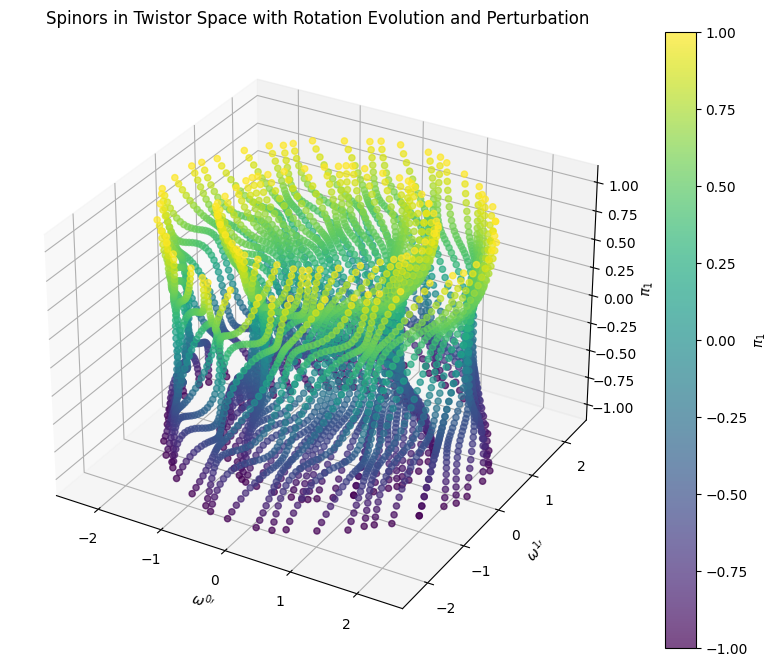

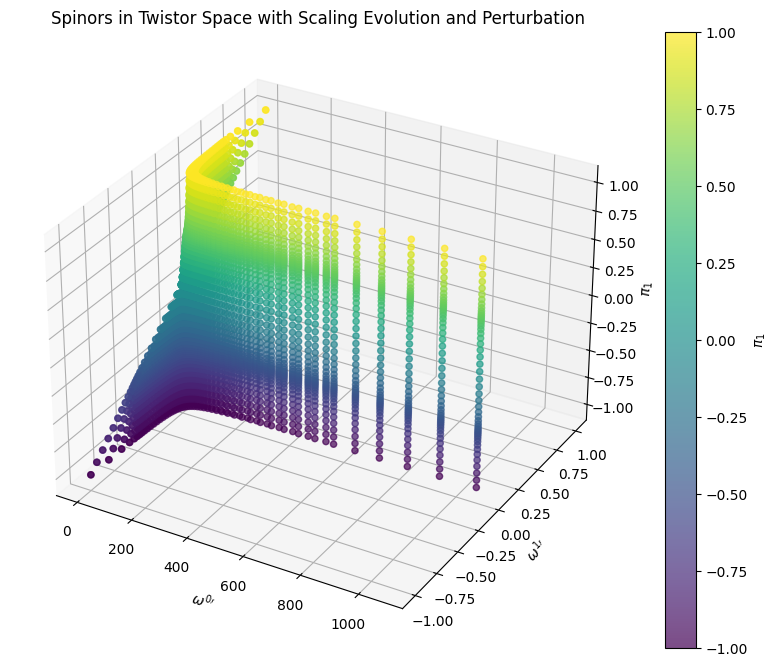

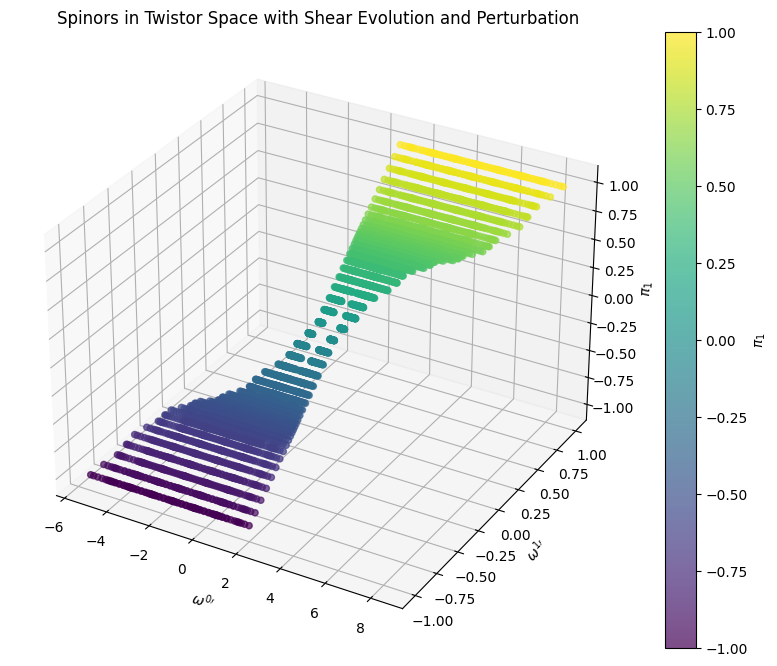

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the intrinsic evolution operator (rotation matrix)
def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

# Define the spinor evolution function
def evolve_spinor(omega, pi, theta, evolution_func, transform_func):
    # Apply intrinsic evolution
    evolution_matrix = evolution_func(theta)
    new_omega = evolution_matrix @ omega

    # Apply transformation function to both omega and pi
    new_omega = transform_func(new_omega)
    new_pi = transform_func(pi)

    return new_omega, new_pi

# Quantum-inspired perturbative transformation (analogous to the example)
def transform_func(v):
    return v + 0.1 * np.sin(2 * np.pi * v)  # Perturbation similar to Sierpinski example

# Generate twistors for visualization
def generate_twistors(pi0_values, pi1_range, theta_range, evolution_func, transform_func):
    twistors = []
    for pi0 in pi0_values:
        for pi1 in pi1_range:
            pi = np.array([pi0, pi1])
            omega = pi.copy()  # Initial omega (could be modified for more complexity)
            for theta in theta_range:
                new_omega, new_pi = evolve_spinor(omega, pi, theta, evolution_func, transform_func)
                twistors.append((new_omega, new_pi))
    return twistors

# Visualize the spinors in twistor space
def visualize_spinors(twistors, title='Spinors in Twistor Space'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract components for plotting
    omega0 = np.array([twistor[0][0] for twistor in twistors])
    omega1 = np.array([twistor[0][1] for twistor in twistors])
    pi1 = np.array([twistor[1][1] for twistor in twistors])  # Using pi1 as color mapping

    scatter = ax.scatter(omega0, omega1, pi1, c=pi1, cmap='viridis', marker='o', alpha=0.7)

    ax.set_xlabel(r'$\omega^{0\prime}$')
    ax.set_ylabel(r'$\omega^{1\prime}$')
    ax.set_zlabel(r'$\pi_1$')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label=r'$\pi_1$')

    plt.show()

# Define different intrinsic evolution operators
def rotation_evolution(theta):
    # Standard rotation
    return intrinsic_evolution(theta)

def scaling_evolution(theta):
    # Scaling matrix
    return np.array([
        [np.exp(theta), 0],
        [0, np.exp(-theta)]
    ])

def shear_evolution(theta):
    # Shear transformation
    return np.array([
        [1, theta],
        [0, 1]
    ])

# Parameters
num_points = 50  # Number of points for pi1
theta_points = 50  # Number of theta values

# Spinor Components (pi_A)
pi0_values = [1, 2]  # Different initial pi0 values to explore different spinors
pi1_range = np.linspace(-1, 1, num_points)

# Theta range (evolution parameter)
theta_range = np.linspace(0, 2 * np.pi, theta_points)

# Evolution functions to explore
evolution_functions = {
    'Rotation': rotation_evolution,
    'Scaling': scaling_evolution,
    'Shear': shear_evolution
}

# Generate and visualize spinors for each evolution function
for name, evolution_func in evolution_functions.items():
    twistors = generate_twistors(pi0_values, pi1_range, theta_range, evolution_func, transform_func)
    visualize_spinors(twistors, title=f'Spinors in Twistor Space with {name} Evolution and Perturbation')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parameters
c = 1.0  # Normalized speed of light
alpha = 1.0
beta = np.pi / 4  # 45 degrees
gamma = 1.0
r = 1.0
l = 1.0

# Extend the range of Theta over multiple cycles
theta_values = np.linspace(0, 4 * np.pi, 200)  # Extend to 4 cycles
x_values = np.linspace(0.5, 2.0, 100)

# Prepare a meshgrid of X and Theta for computation
X, Theta = np.meshgrid(x_values, theta_values)

# Compute the expressions inside the square roots
numerator_expr = l**2 * alpha**2 - X**2 * gamma**2 - 2 * r * X * gamma * np.cos(Theta) + r**2 * np.cos(Theta)**2 - l**2 * alpha**2 * np.sin(beta)**2
denominator_expr = -l**2 * alpha**2 + X**2 * gamma**2 + 2 * r * X * gamma * np.cos(Theta) - r**2 * np.cos(Theta)**2 + l**2 * alpha**2 * np.sin(beta)**2

# Ensure the expressions inside sqrt are non-negative
numerator_expr = np.where(numerator_expr < 0, 0, numerator_expr)
denominator_expr = np.where(denominator_expr <= 0, np.nan, denominator_expr)

# Compute numerator and denominator with safe sqrt
numerator = c * np.sqrt(numerator_expr)
denominator = np.sqrt(denominator_expr)

# Compute phenomenal velocity v = phi_1 / phi_2
v = numerator / denominator

# Compute spinor components (phi_1, phi_2)
phi_1 = numerator
phi_2 = denominator

# Handle NaN and Inf values after division
valid_indices = ~np.isnan(v) & ~np.isinf(v)

# Extract valid data for plotting
X_valid = X[valid_indices]
Theta_valid = Theta[valid_indices]
phi_1_valid = phi_1[valid_indices]
phi_2_valid = phi_2[valid_indices]

# Define the intrinsic evolution operator
def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

# Evolve spinor components
omega_valid = []
for i in range(len(phi_1_valid)):
    pi = np.array([phi_1_valid[i], phi_2_valid[i]])
    omega = pi.copy()  # Initial omega
    theta = Theta_valid.flat[i]
    evolution_matrix = intrinsic_evolution(theta)
    new_omega = evolution_matrix @ omega
    omega_valid.append(new_omega)

omega_valid = np.array(omega_valid)

# Prepare data for plotting
pi_0 = phi_1_valid
pi_1 = phi_2_valid

# Prepare data for plotting
spinor_points = np.array([omega_valid[:, 0], omega_valid[:, 1], pi_1]).T

# Animation function to update plots
def update_plot(frame, scatter, spinor_points):
    scatter._offsets3d = (spinor_points[:, 0], spinor_points[:, 1], spinor_points[:, 2])
    ax.set_title(f"Spinor Evolution at Frame {frame}")
    return scatter,

# Plotting the spinor components in 3D space (twistor space)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(spinor_points[:, 0], spinor_points[:, 1], spinor_points[:, 2],
                     c=pi_1, cmap='viridis', marker='o', alpha=0.6)

ax.set_title('Visualization of Spinor Evolution in Twistor Space')
ax.set_xlabel(r'$\omega^{0\prime}$')
ax.set_ylabel(r'$\omega^{1\prime}$')
ax.set_zlabel(r'$\pi_1$')

plt.colorbar(scatter, ax=ax, label=r'$\pi_1$')

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=range(len(theta_values)),
                    fargs=(scatter, spinor_points), interval=100, blit=False)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

# Function to compute spinor evolution
def compute_spinor_evolution(alpha, beta, gamma, r, l, c=1.0):
    # Adjust the range of Theta
    theta_values = np.linspace(0, 2 * np.pi, 100)
    x_values = np.linspace(0.5, 2.0, 100)

    # Prepare a meshgrid of X and Theta for computation
    X, Theta = np.meshgrid(x_values, theta_values)

    # Compute the expressions inside the square roots
    numerator_expr = l**2 * alpha**2 - X**2 * gamma**2 - 2 * r * X * gamma * np.cos(Theta) + r**2 * np.cos(Theta)**2 - l**2 * alpha**2 * np.sin(beta)**2
    denominator_expr = -l**2 * alpha**2 + X**2 * gamma**2 + 2 * r * X * gamma * np.cos(Theta) - r**2 * np.cos(Theta)**2 + l**2 * alpha**2 * np.sin(beta)**2

    # Ensure the expressions inside sqrt are non-negative
    numerator_expr = np.where(numerator_expr < 0, 0, numerator_expr)
    denominator_expr = np.where(denominator_expr <= 0, np.nan, denominator_expr)

    # Compute numerator and denominator with safe sqrt
    numerator = c * np.sqrt(numerator_expr)
    denominator = np.sqrt(denominator_expr)

    # Compute spinor components (phi_1, phi_2)
    phi_1 = numerator
    phi_2 = denominator

    # Handle NaN and Inf values after division
    valid_indices = ~np.isnan(denominator) & ~np.isinf(denominator)

    # Extract valid data for plotting
    X_valid = X[valid_indices]
    Theta_valid = Theta[valid_indices]
    phi_1_valid = phi_1[valid_indices]
    phi_2_valid = phi_2[valid_indices]

    # To avoid dimension issues, initialize omega_valid as a list of pairs
    omega_valid = []

    # Evolve spinor components
    for i in range(len(phi_1_valid)):
        pi = np.array([phi_1_valid[i], phi_2_valid[i]])
        theta = Theta_valid.flat[i]
        evolution_matrix = intrinsic_evolution(theta)
        new_omega = evolution_matrix @ pi
        omega_valid.append(new_omega)

    omega_valid = np.array(omega_valid)

    # Prepare data for plotting
    spinor_points = np.array([[omega[0], omega[1], pi[1]] for omega, pi in zip(omega_valid, zip(phi_1_valid, phi_2_valid))])
    return spinor_points

# Function to define the intrinsic evolution operator
def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

# Function to visualize the spinor evolution
def visualize_spinor_evolution(alpha=1.0, beta=np.pi/4, gamma=1.0, r=1.0, l=1.0):
    spinor_points = compute_spinor_evolution(alpha, beta, gamma, r, l)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(spinor_points[:, 0], spinor_points[:, 1], spinor_points[:, 2],
                         c=spinor_points[:, 2], cmap='viridis', marker='o', alpha=0.6)

    ax.set_title('Visualization of Spinor Evolution in Twistor Space')
    ax.set_xlabel(r'$\omega^{0\prime}$')
    ax.set_ylabel(r'$\omega^{1\prime}$')
    ax.set_zlabel(r'$\pi_1$')

    plt.colorbar(scatter, ax=ax, label=r'$\pi_1$')
    plt.show()

# Interact with sliders for the parameters
interact(
    visualize_spinor_evolution,
    alpha=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    beta=FloatSlider(min=0.0, max=np.pi, step=0.1, value=np.pi/4),
    gamma=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    r=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    l=FloatSlider(min=0.1, max=3.0, step=0.1, value=1)
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

def compute_spinor_pi(alpha, beta, gamma, r, l, c=1.0):
    # Adjust the range of Theta
    theta_values = np.linspace(0, 2 * np.pi, 100)
    x_values = np.linspace(0.5, 2.0, 100)

    # Prepare a meshgrid of X and Theta for computation
    X, Theta = np.meshgrid(x_values, theta_values)

    # Compute the expressions inside the square roots
    numerator_expr = l**2 * alpha**2 - X**2 * gamma**2 - 2 * r * X * gamma * np.cos(Theta) + r**2 * np.cos(Theta)**2 - l**2 * alpha**2 * np.sin(beta)**2
    denominator_expr = -l**2 * alpha**2 + X**2 * gamma**2 + 2 * r * X * gamma * np.cos(Theta) - r**2 * np.cos(Theta)**2 + l**2 * alpha**2 * np.sin(beta)**2

    # Ensure the expressions inside sqrt are non-negative
    numerator_expr = np.where(numerator_expr < 0, 0, numerator_expr)
    denominator_expr = np.where(denominator_expr <= 0, np.nan, denominator_expr)

    # Compute numerator and denominator with safe sqrt
    numerator = c * np.sqrt(numerator_expr)
    denominator = np.sqrt(denominator_expr)

    # Compute spinor components (phi_1, phi_2)
    phi_1 = numerator
    phi_2 = denominator

    # Handle NaN and Inf values after division
    valid_indices = ~np.isnan(denominator) & ~np.isinf(denominator)

    # Extract valid data for plotting
    X_valid = X[valid_indices]
    Theta_valid = Theta[valid_indices]
    phi_1_valid = phi_1[valid_indices]
    phi_2_valid = phi_2[valid_indices]

    # Compute spinor components (phi_1, phi_2)
    phi_1 = numerator
    phi_2 = denominator

    # Handle NaN and Inf values after division
    valid_indices = ~np.isnan(phi_1) & ~np.isinf(phi_1)

    # Extract valid data for plotting
    X_valid = X[valid_indices]
    Theta_valid = Theta[valid_indices]
    phi_1_valid = phi_1[valid_indices]
    phi_2_valid = phi_2[valid_indices]

    # To avoid dimension issues, initialize omega_valid as a list of pairs
    omega_valid = []

    # Evolve spinor components
    for i in range(len(phi_1_valid)):
        pi = np.array([phi_1_valid[i], phi_2_valid[i]])
        theta = Theta_valid.flat[i]
        evolution_matrix = intrinsic_evolution(theta)
        new_omega = evolution_matrix @ pi
        omega_valid.append(new_omega)

    omega_valid = np.array(omega_valid)

    # Prepare data for plotting
    spinor_points = np.array([[omega[0], omega[1], pi[1]] for omega, pi in zip(omega_valid, zip(phi_1_valid, phi_2_valid))])
    return spinor_points

def visualize_spinor_evolution(alpha, beta, gamma=1.0, r=1.0, l=1.0, theta=0):
    spinor_points = compute_spinor_pi(alpha, beta, gamma, r, l)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(spinor_points[:, 0], spinor_points[:, 1], spinor_points[:, 2],
                c=spinor_points[:, 2], cmap='viridis', marker='o', alpha=0.6)
    plt.scatter([spinor_points[theta, 0]], [spinor_points[theta, 1]], [spinor_points[theta, 2]],
                c='red', marker='s', label='theta = ' + str(theta))

    ax.set_title('Visualization of Spinor Evolution in Twistor Space')
    ax.set_xlabel(r'$\omega^{0\prime}$')
    ax.set_ylabel(r'$\omega^{1\prime}$')
    ax.set_zlabel(r'$\pi_1$')

    plt.legend()
    plt.show()

# Interact with sliders for the parameters
interact(
    visualize_spinor_evolution,
    alpha=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    beta=FloatSlider(min=0.0, max=np.pi, step=0.1, value=np.pi/4),
    gamma=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    r=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    l=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    theta=IntSlider(min=0, max=99, step=1, value=0)
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def intrinsic_evolution(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

def m_posit_transform(spinor_points):
    # Apply quantum-inspired perturbations to spinor components
    perturbed_points = spinor_points + 0.1 * np.sin(2 * np.pi * spinor_points)  # Example perturbation
    return perturbed_points

def compute_spinor_pi(alpha, beta, gamma, r, l, c=1.0):
    # Adjust the range of Theta
    theta_values = np.linspace(0, 2 * np.pi, 100)
    x_values = np.linspace(0.5, 2.0, 100)

    # Prepare a meshgrid of X and Theta for computation
    X, Theta = np.meshgrid(x_values, theta_values)

    # Compute the expressions inside the square roots
    numerator_expr = l**2 * alpha**2 - X**2 * gamma**2 - 2 * r * X * gamma * np.cos(Theta) + r**2 * np.cos(Theta)**2 - l**2 * alpha**2 * np.sin(beta)**2
    denominator_expr = -l**2 * alpha**2 + X**2 * gamma**2 + 2 * r * X * gamma * np.cos(Theta) - r**2 * np.cos(Theta)**2 + l**2 * alpha**2 * np.sin(beta)**2

    # Ensure the expressions inside sqrt are non-negative
    numerator_expr = np.where(numerator_expr < 0, 0, numerator_expr)
    denominator_expr = np.where(denominator_expr <= 0, np.nan, denominator_expr)

    # Compute numerator and denominator with safe sqrt
    numerator = c * np.sqrt(numerator_expr)
    denominator = np.sqrt(denominator_expr)

    # Compute spinor components (phi_1, phi_2)
    phi_1 = numerator
    phi_2 = denominator

    # Handle NaN and Inf values after division
    valid_indices = ~np.isnan(denominator) & ~np.isinf(denominator)

    # Extract valid data for plotting
    X_valid = X[valid_indices]
    Theta_valid = Theta[valid_indices]
    phi_1_valid = phi_1[valid_indices]
    phi_2_valid = phi_2[valid_indices]

    # Compute spinor components (phi_1, phi_2)
    phi_1 = numerator
    phi_2 = denominator

    # Handle NaN and Inf values after division
    valid_indices = ~np.isnan(phi_1) & ~np.isinf(phi_1)

    # Extract valid data for plotting
    X_valid = X[valid_indices]
    Theta_valid = Theta[valid_indices]
    phi_1_valid = phi_1[valid_indices]
    phi_2_valid = phi_2[valid_indices]

    # To avoid dimension issues, initialize omega_valid as a list of pairs
    omega_valid = []

    # Evolve spinor components
    for i in range(len(phi_1_valid)):
        pi = np.array([phi_1_valid[i], phi_2_valid[i]])
        theta = Theta_valid.flat[i]
        evolution_matrix = intrinsic_evolution(theta)
        new_omega = evolution_matrix @ pi
        omega_valid.append(new_omega)

    omega_valid = np.array(omega_valid)

    # Prepare data for plotting
    spinor_points = np.array([[omega[0], omega[1], pi[1]] for omega, pi in zip(omega_valid, zip(phi_1_valid, phi_2_valid))])
    return spinor_points

def visualize_spinor_evolution(alpha, beta, gamma=1.0, r=1.0, l=1.0, theta=0):
    spinor_points = compute_spinor_pi(alpha, beta, gamma, r, l)
    transformed_spinor_points = m_posit_transform(spinor_points)

    fig = plt.figure(figsize=(15, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(spinor_points[:, 0], spinor_points[:, 1], spinor_points[:, 2],
                c=spinor_points[:, 2], cmap='viridis', marker='o', alpha=0.6)
    ax1.set_title('Initial Spinor Evolution')
    ax1.set_xlabel(r'$\omega^{0\prime}$')
    ax1.set_ylabel(r'$\omega^{1\prime}$')
    ax1.set_zlabel(r'$\pi_1$')

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(transformed_spinor_points[:, 0], transformed_spinor_points[:, 1], transformed_spinor_points[:, 2],
                c=transformed_spinor_points[:, 2], cmap='viridis', marker='o', alpha=0.6)
    ax2.set_title('Transformed Spinor Evolution')
    ax2.set_xlabel(r'$\omega^{0\prime}$')
    ax2.set_ylabel(r'$\omega^{1\prime}$')
    ax2.set_zlabel(r'$\pi_1$')

    plt.show()

# Interact with sliders for the parameters
interact(
    visualize_spinor_evolution,
    alpha=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    beta=FloatSlider(min=0.0, max=np.pi, step=0.1, value=np.pi/4),
    gamma=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    r=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    l=FloatSlider(min=0.1, max=3.0, step=0.1, value=1),
    theta=IntSlider(min=0, max=99, step=1, value=0)
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k_value = 1.0  # Wave number in spatial dimension
n_value = 2.0  # Frequency in angular dimension

# Discretize the theta variable and spatial dimensions
theta_values = np.linspace(0, 2 * np.pi, 100)  # 100 points from 0 to 2π
x_values = np.linspace(-10, 10, 100)           # 100 points from -10 to 10

# Create a meshgrid for spatial dimensions (1D for simplicity)
X, Theta = np.meshgrid(x_values, theta_values)

# Define the field as a function of x and theta
def phi_numerical(x, theta, k, n):
    return np.sin(k * x) * np.cos(n * theta)

# Evaluate the field
phi_values = phi_numerical(X, Theta, k_value, n_value)

# Compute the gradient numerically
phi_x = np.gradient(phi_values, x_values, axis=1)      # Gradient with respect to x
phi_theta = np.gradient(phi_values, theta_values, axis=0)  # Gradient with respect to theta

# Compute the kinetic term (assuming time derivatives are included)
kinetic_term = 0.5 * (phi_x**2 + phi_theta**2)

# Define potential term numerically
def V_numerical(phi):
    return 0.5 * phi**2

potential_term = V_numerical(phi_values)

# Compute Lagrangian density numerically
lagrangian_density_num = kinetic_term - potential_term

# Optional: Plotting the Lagrangian density for visualization
plt.figure(figsize=(8, 6))
# Use extent to properly label axes
extent = [x_values.min(), x_values.max(), theta_values.min(), theta_values.max()]
plt.imshow(lagrangian_density_num, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Lagrangian Density')
plt.xlabel('x')
plt.ylabel(r'$\theta$')
plt.title('Lagrangian Density $\mathcal{L}(x, \theta)$')
plt.show()